In [11]:
import pandas as pd
from sqlalchemy import create_engine

# Load the Excel file (make sure it’s uploaded in the same folder as your notebook)
df = pd.read_excel("Final_Uber_Dashboard_With_Charts.xlsx", sheet_name="Data")

# Create SQLite file-based DB to allow SQL queries to access the same data
engine = create_engine('sqlite:///uber_data.db', echo=False)

# Save DataFrame to SQL table
df.to_sql('uber', con=engine, if_exists='replace', index=False)

# Preview
df.head()



,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour,Request day,Time Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,Monday,Day
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,Monday,Evening
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,Tuesday,Early Morning
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,Tuesday,Evening
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Wednesday,Early Morning


In [13]:
# Load SQL magic extension
%reload_ext sql

# Connect to the SQLite DB file you created
%sql sqlite:///uber_data.db

# Fix SQL table formatting display (avoids prettytable errors/warnings)
%config SqlMagic.style = 'PLAIN_COLUMNS'



In [14]:
%%sql
SELECT Status, COUNT(*) AS request_count
FROM uber
GROUP BY Status
ORDER BY request_count DESC;



   sqlite://
 * sqlite:///uber_data.db
Done.


Status,request_count
Trip Completed,2831
No Cars Available,2650
Cancelled,1264


In [15]:
%%sql
SELECT [Time Slot], Status, COUNT(*) AS count
FROM uber
GROUP BY [Time Slot], Status
ORDER BY [Time Slot];




   sqlite://
 * sqlite:///uber_data.db
Done.


Time Slot,Status,count
Day,Cancelled,168
Day,No Cars Available,334
Day,Trip Completed,722
Early Morning,Cancelled,843
Early Morning,No Cars Available,406
Early Morning,Trip Completed,854
Evening,Cancelled,166
Evening,No Cars Available,1392
Evening,Trip Completed,784
Late Night,Cancelled,65


In [16]:
%%sql
SELECT [Pickup point], Status, COUNT(*) AS count
FROM uber
GROUP BY [Pickup point], Status
ORDER BY [Pickup point];


   sqlite://
 * sqlite:///uber_data.db
Done.


Pickup point,Status,count
Airport,Cancelled,198
Airport,No Cars Available,1713
Airport,Trip Completed,1327
City,Cancelled,1066
City,No Cars Available,937
City,Trip Completed,1504


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt


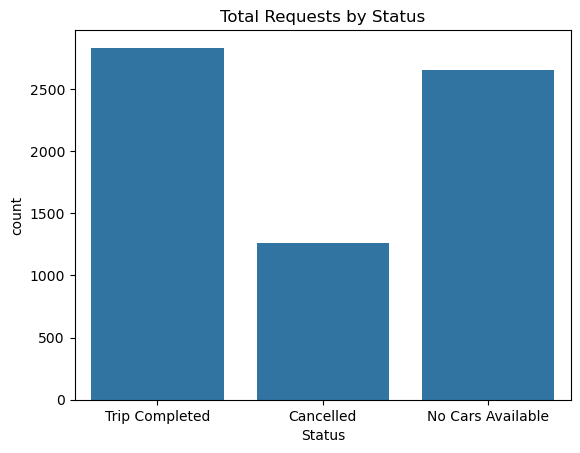

In [18]:
sns.countplot(data=df, x="Status")
plt.title("Total Requests by Status")
plt.show()


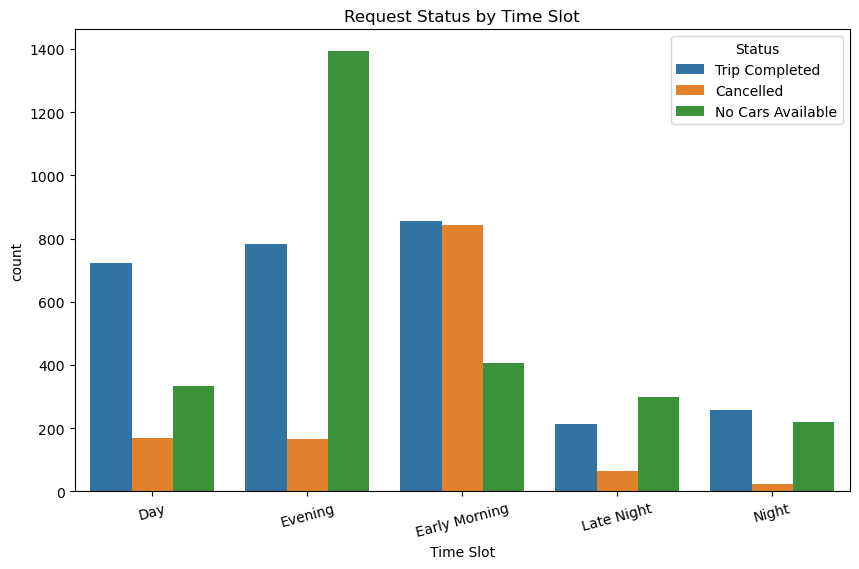

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Time Slot", hue="Status")
plt.title("Request Status by Time Slot")
plt.xticks(rotation=15)
plt.show()


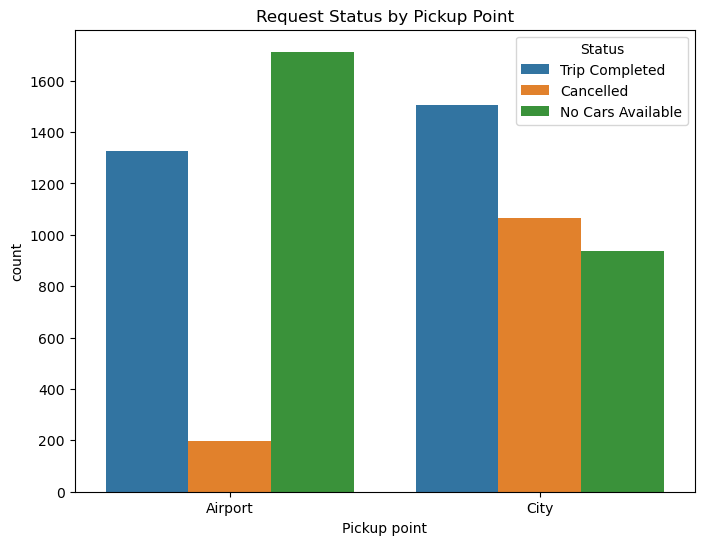

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Pickup point", hue="Status")
plt.title("Request Status by Pickup Point")
plt.show()
